In [2]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
file_path = r"D:\Python\Salary_Predicition\adult 3.csv"
data = pd.read_csv(file_path)

In [7]:
print("First 5 rows of data:")
display(data.head())

print("\nColumns/features in the dataset:")
print(data.columns.tolist())


First 5 rows of data:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K



Columns/features in the dataset:
['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [8]:
print("Dataset Info:")
data.info()

print("\nMissing values per column:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB

Missing values per column:
age                0
workclass    

In [9]:
data.replace('?', np.nan, inplace=True)

print("Missing values after replacing '?':")
print(data.isnull().sum())


Missing values after replacing '?':
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [10]:
for column in data.columns:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mode()[0], inplace=True)

print("Missing values after filling:")
print(data.isnull().sum())


Missing values after filling:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


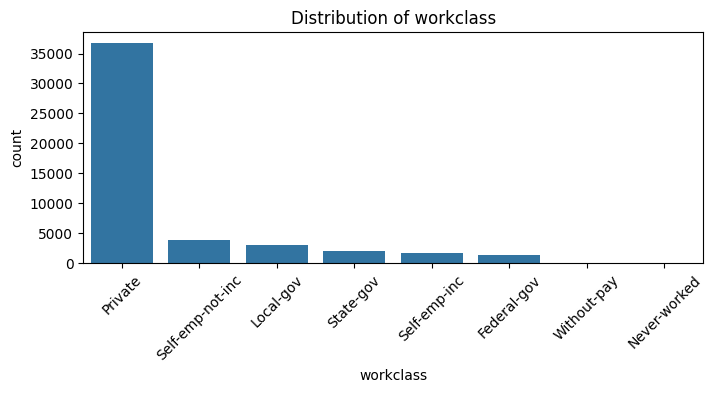

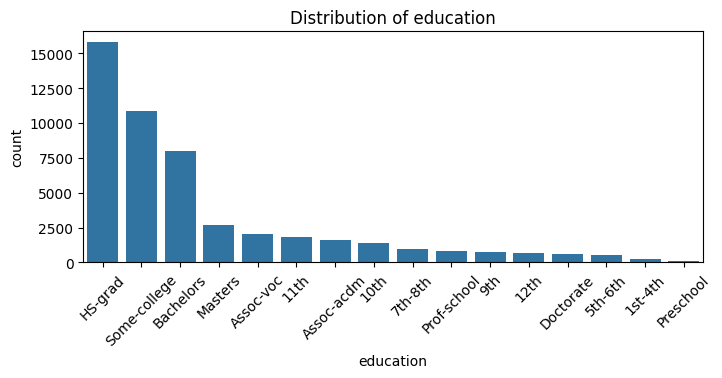

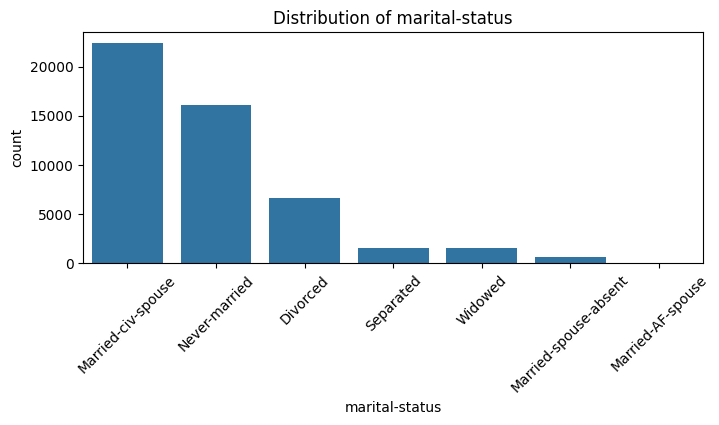

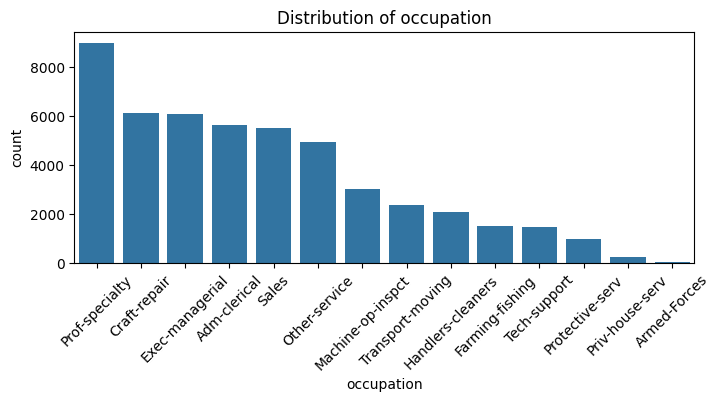

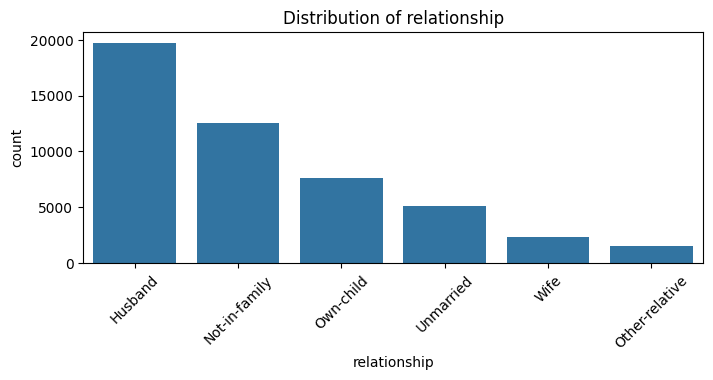

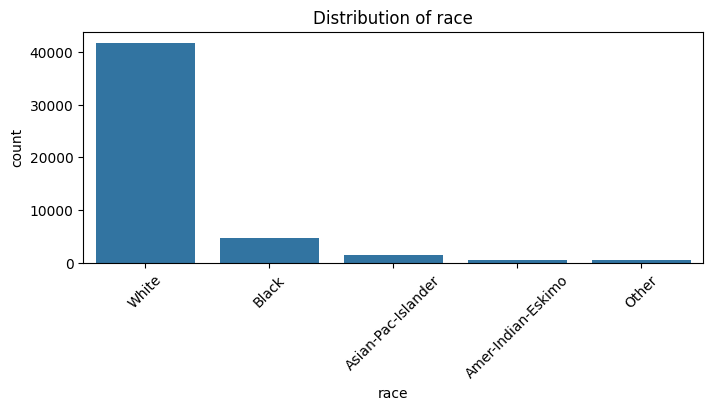

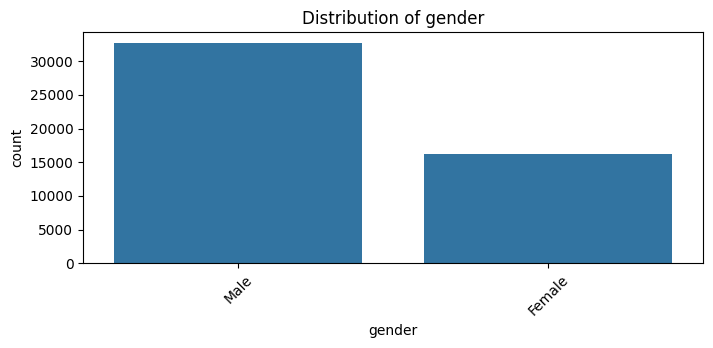

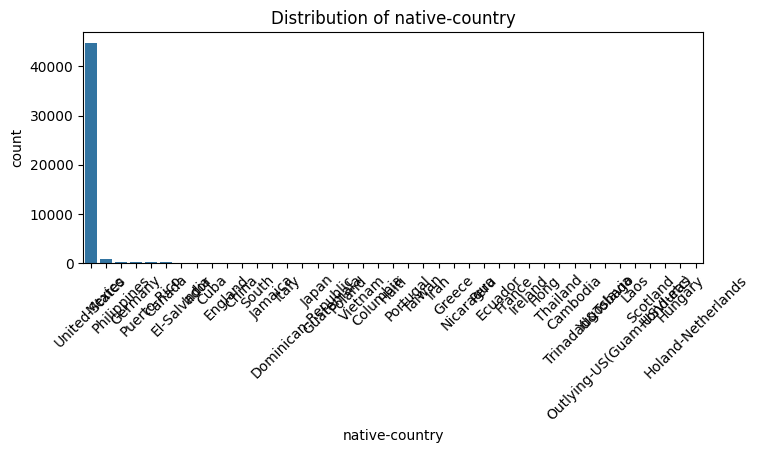

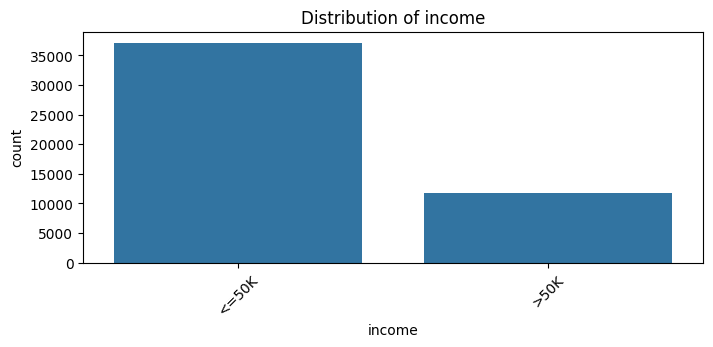

In [11]:
categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8,3))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [12]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Summary statistics for numeric features:")
display(data[numeric_cols].describe())

Summary statistics for numeric features:


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


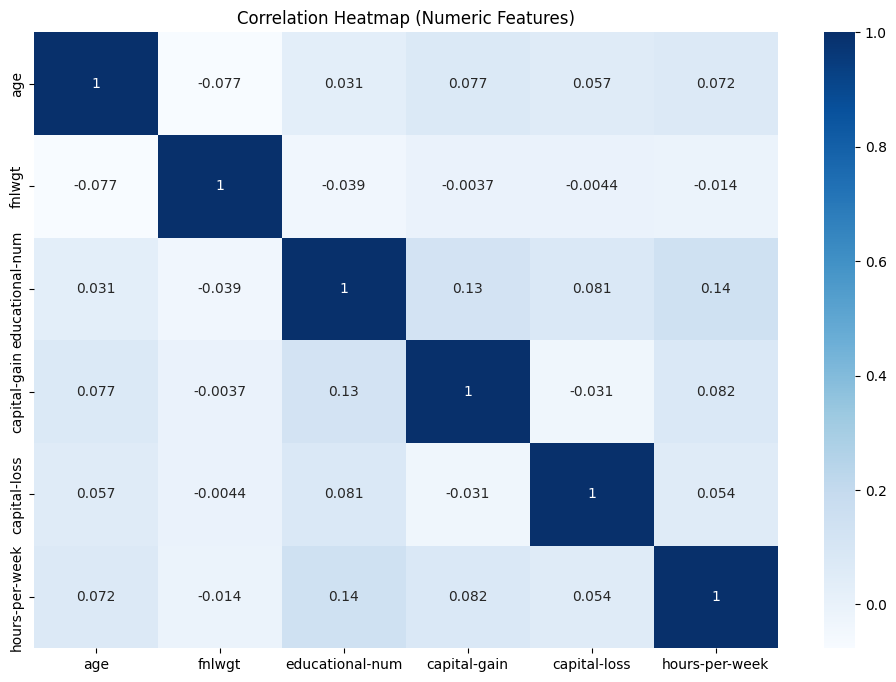

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in data.select_dtypes(include='object').columns:
    data[column] = le.fit_transform(data[column])

print("Sample data after encoding categorical features:")
display(data.head())

print("Data columns and dtypes after encoding:")
print(data.dtypes)


Sample data after encoding categorical features:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,0


Data columns and dtypes after encoding:
age                int64
workclass          int32
fnlwgt             int64
education          int32
educational-num    int64
marital-status     int32
occupation         int32
relationship       int32
race               int32
gender             int32
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int32
income             int32
dtype: object


In [15]:
from sklearn.model_selection import train_test_split

X = data.drop('income', axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (39073, 14)
Test set shape: (9769, 14)


In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.64      0.68      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



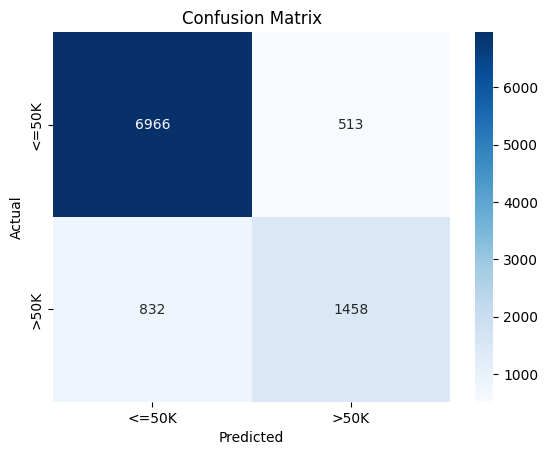

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=['<=50K','>50K'], 
            yticklabels=['<=50K','>50K'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [20]:
row = X_test.iloc[0].values.reshape(1, -1)
prediction = model.predict(row)
print("Predicted income:", '>50K' if prediction[0] == 1 else '<=50K')


Predicted income: <=50K
